In [1]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back):]
        dataX.append(a)
        dataY.append(dataset[i:(i + look_back):])
    
    dataX=np.squeeze(dataX,axis=1) #차원 축소
    dataY=np.squeeze(dataY,axis=1) #차원 축소
    return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
data1=pd.read_excel('x_data.xls') #x좌표 엑셀 데이터 불러옴 
data2=pd.read_excel('y_data.xls') #y좌표 엑셀 데이터 불러옴 
data3=pd.read_excel('speed.xls') #speed좌표 엑셀 데이터 불러옴 

pddata1=pd.DataFrame(data1) 
pddata1.head()
pddata2=pd.DataFrame(data2) 
pddata2.head()
pddata3=pd.DataFrame(data3) 
pddata3.head()

hap=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])
    s_data=np.array(pddata3.loc[j])

    hap1=[] #[x,y,속력] 데이터를 저장하고 있는 리스트
    
    for i in range(len(s_data)): 
        sum=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum.append(x_data[i]) #x넣음
        sum.append(y_data[i]) #y넣음
        sum.append(s_data[i]) #속력넣음
        hap1.append(sum) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    hap.append(hap1)

n1 = np.array(hap)
print(n1.shape) #257,99,3 257개의 Sample과 99개 시계열, 3개 feature(x,y,속력)

(257, 99, 3)


In [5]:
num_sample = n1.shape[0] # 257개 Sample 데이터
num_sequence = n1.shape[1] # 99개 시계열 데이터
num_feature = n1.shape[2] #3개 Feature

dataset = n1

In [6]:
dataset

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [7]:
train_size = int(len(dataset) * 0.70) #학습 데이터 70%
test_size = len(dataset) - train_size #테스트 데이터 30%
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
train

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [9]:
test

array([[[383.        , 461.        ,   0.        ],
        [383.        , 461.        ,   0.        ],
        [383.        , 461.        ,   0.        ],
        ...,
        [414.        , 396.        ,   0.        ],
        [414.        , 396.        ,   4.24264069],
        [417.        , 393.        ,   0.        ]],

       [[511.        , 314.        ,   0.        ],
        [511.        , 314.        ,   0.        ],
        [511.        , 314.        ,   0.        ],
        ...,
        [531.        , 443.        ,   0.        ],
        [531.        , 443.        ,   1.41421356],
        [532.        , 444.        ,   0.        ]],

       [[534.        , 456.        ,   0.        ],
        [534.        , 456.        ,   0.        ],
        [534.        , 456.        ,   0.        ],
        ...,
        [424.        , 532.        ,   0.        ],
        [424.        , 532.        ,   0.        ],
        [424.        , 532.        ,   2.82842712]],

       ...,

      

In [10]:
np.shape(dataset)

(257, 99, 3)

In [11]:
np.shape(train)

(179, 99, 3)

In [12]:
np.shape(test)

(78, 99, 3)

In [13]:
look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
np.shape(trainX)

(177, 99, 3)

In [15]:
np.shape(testX)

(76, 99, 3)

In [16]:
np.shape(trainY)

(177, 99, 3)

In [17]:
np.shape(testY)

(76, 99, 3)

In [24]:
from keras.layers import TimeDistributed
from keras.layers import InputLayer
from keras.layers import Reshape
from keras.layers import *
from keras.models import *
from keras.utils import *

model = Sequential() # Sequeatial Model 
model.add(LSTM(32,return_sequences=True, input_shape=(num_sequence,num_feature)))  
model.add(Dense(3, activation='softmax')) # 3개의 예측
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

history = model.fit(trainX, trainY, epochs=300, batch_size=20, validation_split=0.2, verbose=1)

Train on 141 samples, validate on 36 samples
Epoch 1/300
141/141 [==============================] - 1s 11ms/step - loss: 773.8336 - accuracy: 0.4525 - val_loss: 713.9768 - val_accuracy: 0.6655
Epoch 2/300
141/141 [==============================] - 1s 4ms/step - loss: 715.2728 - accuracy: 0.8056 - val_loss: 680.1949 - val_accuracy: 0.8967
Epoch 3/300
141/141 [==============================] - 1s 4ms/step - loss: 681.7444 - accuracy: 0.8457 - val_loss: 649.1027 - val_accuracy: 0.7912
Epoch 4/300
141/141 [==============================] - 1s 4ms/step - loss: 650.1717 - accuracy: 0.7756 - val_loss: 623.0181 - val_accuracy: 0.7738
Epoch 5/300
141/141 [==============================] - 1s 5ms/step - loss: 625.7724 - accuracy: 0.7897 - val_loss: 603.0546 - val_accuracy: 0.7851
Epoch 6/300
141/141 [==============================] - 1s 5ms/step - loss: 604.8979 - accuracy: 0.8043 - val_loss: 584.2035 - val_accuracy: 0.7884
Epoch 7/300
141/141 [==============================] - 1s 4ms/step - los

141/141 [==============================] - 1s 5ms/step - loss: 550.8113 - accuracy: 0.9760 - val_loss: 541.2978 - val_accuracy: 0.9576
Epoch 57/300
141/141 [==============================] - 1s 5ms/step - loss: 550.7907 - accuracy: 0.9807 - val_loss: 541.2586 - val_accuracy: 0.9512
Epoch 58/300
141/141 [==============================] - 1s 4ms/step - loss: 550.7640 - accuracy: 0.9632 - val_loss: 541.2406 - val_accuracy: 0.9545
Epoch 59/300
141/141 [==============================] - 1s 5ms/step - loss: 550.7341 - accuracy: 0.9787 - val_loss: 541.2121 - val_accuracy: 0.9548
Epoch 60/300
141/141 [==============================] - 1s 5ms/step - loss: 550.6998 - accuracy: 0.9666 - val_loss: 541.1981 - val_accuracy: 0.9523
Epoch 61/300
141/141 [==============================] - 1s 4ms/step - loss: 550.6921 - accuracy: 0.9721 - val_loss: 541.1791 - val_accuracy: 0.9529
Epoch 62/300
141/141 [==============================] - 1s 4ms/step - loss: 550.6693 - accuracy: 0.9652 - val_loss: 541.1674 

141/141 [==============================] - 1s 5ms/step - loss: 550.2837 - accuracy: 0.9867 - val_loss: 540.7551 - val_accuracy: 0.9801
Epoch 112/300
141/141 [==============================] - 1s 4ms/step - loss: 550.2807 - accuracy: 0.9842 - val_loss: 540.7613 - val_accuracy: 0.9798
Epoch 113/300
141/141 [==============================] - 1s 5ms/step - loss: 550.3122 - accuracy: 0.9872 - val_loss: 540.7592 - val_accuracy: 0.9812
Epoch 114/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2929 - accuracy: 0.9844 - val_loss: 540.7730 - val_accuracy: 0.9717
Epoch 115/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2877 - accuracy: 0.9820 - val_loss: 540.7747 - val_accuracy: 0.9795
Epoch 116/300
141/141 [==============================] - 1s 5ms/step - loss: 550.2878 - accuracy: 0.9843 - val_loss: 540.7733 - val_accuracy: 0.9733
Epoch 117/300
141/141 [==============================] - 1s 4ms/step - loss: 550.2811 - accuracy: 0.9859 - val_loss: 540

141/141 [==============================] - 1s 4ms/step - loss: 550.1829 - accuracy: 0.9837 - val_loss: 540.6601 - val_accuracy: 0.9798
Epoch 167/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1696 - accuracy: 0.9855 - val_loss: 540.6675 - val_accuracy: 0.9843
Epoch 168/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1729 - accuracy: 0.9857 - val_loss: 540.6671 - val_accuracy: 0.9820
Epoch 169/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1795 - accuracy: 0.9830 - val_loss: 540.6694 - val_accuracy: 0.9736
Epoch 170/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1817 - accuracy: 0.9866 - val_loss: 540.6566 - val_accuracy: 0.9801
Epoch 171/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1673 - accuracy: 0.9871 - val_loss: 540.6636 - val_accuracy: 0.9820
Epoch 172/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1687 - accuracy: 0.9870 - val_loss: 540

141/141 [==============================] - 1s 5ms/step - loss: 550.1438 - accuracy: 0.9875 - val_loss: 540.6494 - val_accuracy: 0.9809
Epoch 222/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1529 - accuracy: 0.9824 - val_loss: 540.6461 - val_accuracy: 0.9843
Epoch 223/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1493 - accuracy: 0.9863 - val_loss: 540.6640 - val_accuracy: 0.9798
Epoch 224/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1430 - accuracy: 0.9862 - val_loss: 540.6515 - val_accuracy: 0.9826
Epoch 225/300
141/141 [==============================] - 1s 6ms/step - loss: 550.1474 - accuracy: 0.9848 - val_loss: 540.6354 - val_accuracy: 0.9829
Epoch 226/300
141/141 [==============================] - 1s 6ms/step - loss: 550.1442 - accuracy: 0.9852 - val_loss: 540.6353 - val_accuracy: 0.9832
Epoch 227/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1381 - accuracy: 0.9871 - val_loss: 540

141/141 [==============================] - 1s 5ms/step - loss: 550.1186 - accuracy: 0.9921 - val_loss: 540.6253 - val_accuracy: 0.9902
Epoch 277/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1212 - accuracy: 0.9911 - val_loss: 540.6289 - val_accuracy: 0.9846
Epoch 278/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1255 - accuracy: 0.9904 - val_loss: 540.6127 - val_accuracy: 0.9905
Epoch 279/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1143 - accuracy: 0.9914 - val_loss: 540.6155 - val_accuracy: 0.9891
Epoch 280/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1145 - accuracy: 0.9927 - val_loss: 540.6073 - val_accuracy: 0.9927
Epoch 281/300
141/141 [==============================] - 1s 5ms/step - loss: 550.1156 - accuracy: 0.9908 - val_loss: 540.6088 - val_accuracy: 0.9910
Epoch 282/300
141/141 [==============================] - 1s 4ms/step - loss: 550.1104 - accuracy: 0.9917 - val_loss: 540

In [25]:
print("정확도: ",(model.evaluate(testX, testY)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print('y: ',testY,', predict: ',model.predict(trainX).flatten())

76/76 [==============================] - 0s 1ms/step
정확도:  [550.2738422594572, 0.9827219843864441]
y:  [[[383.         461.           0.        ]
  [383.         461.           0.        ]
  [383.         461.           0.        ]
  ...
  [414.         396.           0.        ]
  [414.         396.           4.24264069]
  [417.         393.           0.        ]]

 [[511.         314.           0.        ]
  [511.         314.           0.        ]
  [511.         314.           0.        ]
  ...
  [531.         443.           0.        ]
  [531.         443.           1.41421356]
  [532.         444.           0.        ]]

 [[534.         456.           0.        ]
  [534.         456.           0.        ]
  [534.         456.           0.        ]
  ...
  [424.         532.           0.        ]
  [424.         532.           0.        ]
  [424.         532.           2.82842712]]

 ...

 [[514.         637.           0.        ]
  [514.         637.           0.        ]
  [514.

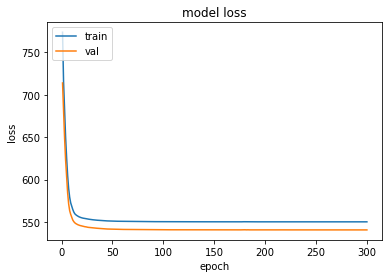

In [26]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
haps=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])

    hap2=[] #[x,y,속력] 데이터를 저장하고 있는 리스트
    
    for i in range(len(s_data)): 
        sum2=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum2.append(x_data[i]) #x넣음
        sum2.append(y_data[i]) #y넣음
        hap2.append(sum2) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    haps.append(hap2)

n2 = np.array(haps)
print(n2.shape) #257,99,3 257개의 Sample과 99개 시계열, 3개 feature(x,y,속력)

(257, 99, 2)


In [31]:
num_sample2 = n2.shape[0] # 257개 Sample 데이터
num_sequence2 = n2.shape[1] # 99개 시계열 데이터
num_feature2 = n2.shape[2] #3개 Feature

dataset2 = n2

In [38]:
train_size2 = int(len(dataset2) * 0.70) #학습 데이터 70%
test_size2 = len(dataset2) - train_size2 #테스트 데이터 30%
train2, test2 = dataset2[0:train_size2,:], dataset2[train_size2:len(dataset2),:]

In [39]:
train2

array([[[388, 252],
        [388, 252],
        [388, 252],
        ...,
        [224, 357],
        [224, 357],
        [224, 357]],

       [[210, 371],
        [210, 371],
        [210, 371],
        ...,
        [335, 426],
        [335, 426],
        [335, 426]],

       [[563, 328],
        [563, 328],
        [563, 328],
        ...,
        [407, 433],
        [407, 433],
        [407, 433]],

       ...,

       [[379, 280],
        [379, 280],
        [379, 280],
        ...,
        [196, 391],
        [196, 391],
        [194, 393]],

       [[189, 400],
        [189, 400],
        [189, 400],
        ...,
        [192, 497],
        [192, 497],
        [192, 499]],

       [[192, 528],
        [192, 528],
        [192, 528],
        ...,
        [379, 469],
        [379, 469],
        [379, 469]]], dtype=int64)

In [40]:
test2

array([[[383, 461],
        [383, 461],
        [383, 461],
        ...,
        [414, 396],
        [414, 396],
        [417, 393]],

       [[511, 314],
        [511, 314],
        [511, 314],
        ...,
        [531, 443],
        [531, 443],
        [532, 444]],

       [[534, 456],
        [534, 456],
        [534, 456],
        ...,
        [424, 532],
        [424, 532],
        [424, 532]],

       ...,

       [[405, 275],
        [405, 275],
        [405, 275],
        ...,
        [206, 422],
        [206, 422],
        [206, 422]],

       [[201, 423],
        [201, 423],
        [201, 423],
        ...,
        [180, 501],
        [180, 503],
        [180, 503]],

       [[180, 545],
        [180, 545],
        [180, 545],
        ...,
        [219, 285],
        [218, 276],
        [218, 276]]], dtype=int64)

In [41]:
look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX2, trainY2 = create_dataset(train2, look_back)
testX2, testY2 = create_dataset(test2, look_back)

In [44]:
trainX2

array([[[388, 252],
        [388, 252],
        [388, 252],
        ...,
        [224, 357],
        [224, 357],
        [224, 357]],

       [[210, 371],
        [210, 371],
        [210, 371],
        ...,
        [335, 426],
        [335, 426],
        [335, 426]],

       [[563, 328],
        [563, 328],
        [563, 328],
        ...,
        [407, 433],
        [407, 433],
        [407, 433]],

       ...,

       [[361, 417],
        [361, 417],
        [361, 417],
        ...,
        [311, 368],
        [311, 368],
        [303, 363]],

       [[200, 247],
        [200, 247],
        [200, 247],
        ...,
        [278, 256],
        [287, 259],
        [287, 259]],

       [[379, 280],
        [379, 280],
        [379, 280],
        ...,
        [196, 391],
        [196, 391],
        [194, 393]]], dtype=int64)

ValueError: x and y can be no greater than 2-D, but have shapes (177, 99, 2) and (177, 99, 2)

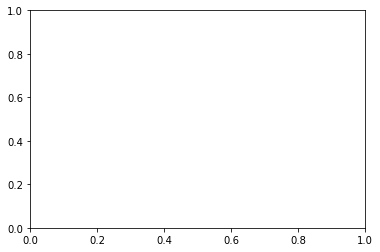

In [42]:
plt.plot(trainX2,trainY2) #초반 부분 train 데이터
plt.show()
plt.plot(testX2,testY2) #후반 부분 test 데이터
plt.show()